In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from IPython.display import clear_output
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import linear_model
#a remove :[8, 10, 12, 13, 22, 96, 117, 126, 136, 137]

In [3]:
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def MAPE(Y_Predicted,Y_actual):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [10]:
variables = pickle.load(open(r'jeu_variables_1.pkl','rb'))
entetes = np.array(variables['X']).reshape(63,141)[:,0]
X = np.array(variables['X']).reshape(63,141)[:,1:141].T.astype('float')
Y = np.array(variables['Y']).reshape(140).astype('float')
remove_bat = [8, 10, 12, 13, 22, 96, 117, 126, 136, 137]
X_clean = np.delete(X, remove_bat, 0)
Y_clean = np.delete(Y, remove_bat)
X = X_clean
Y = Y_clean

In [8]:
def preprossessing(X,Y):# Séparation des données
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
    
    # Normalisation des données
    #sc = StandardScaler(with_mean=True, with_std=True)
    #sc.fit(X_train)
    #X_train = sc.transform(X_train)
    #X_test = sc.transform(X_test)
    return X_train, X_test, Y_train, Y_test

In [9]:
def normalize(X_train, X_test):
    sc = StandardScaler(with_mean=True, with_std=True)
    sc.fit(X_train)
    X_train_n = sc.transform(X_train)
    X_test_n = sc.transform(X_test)
    return sc, X_train_n, X_test_n

In [11]:
X_train, X_test, Y_train, Y_test = preprossessing(X, Y)
sc_x,  X_train_n, X_test_n = normalize(X_train , X_test)
sc_y, Y_train_n, Y_test_n = normalize(Y_train.reshape(-1, 1) ,Y_test.reshape(-1,1))
#print(np.mean(X_train_n[:, 1]))

In [12]:
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(X_train_n, Y_train_n)
Y_train_predict_n = rf.predict(X_train_n)
Y_predict_n = rf.predict(X_test_n)
print(f"RMSE train normalisé : {RMSE(Y_train_predict_n, Y_train_n)}")
print(f"RMSE test normalisé : {RMSE(Y_predict_n, Y_test_n)}")
#on dénormalise
Y_predict = sc_y.inverse_transform(Y_predict_n.reshape(-1,1))
print(f"RMSE test normalisé : {RMSE(Y_predict, Y_test)}")
print(rf.feature_importances_)
max_feature_importance = np.argmax(rf.feature_importances_)
print(entetes[max_feature_importance])

/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE train normalisé : 1.3561004387197944
RMSE test normalisé : 1.3714323383969866
RMSE test normalisé : 420.5665971086509
[4.70919541e-04 1.37329508e-03 1.15218215e-03 8.77903404e-02
 1.89238383e-03 1.58006584e-03 6.93796096e-04 9.18546105e-03
 3.06765793e-03 4.85289403e-04 7.65122317e-03 9.56848416e-04
 3.13389108e-01 5.02101332e-04 3.52255570e-02 7.69028923e-04
 1.75853083e-02 1.20536607e-03 5.57052477e-03 9.09989282e-04
 1.67415106e-03 2.02964034e-01 1.85919582e-03 4.42016054e-02
 2.99655219e-03 8.98101099e-03 8.44032575e-04 5.50782859e-04
 1.75089472e-02 1.91266723e-02 2.12306176e-03 1.16969184e-03
 7.57033748e-04 7.86962403e-03 3.94590066e-04 4.57182183e-03
 1.47295683e-03 1.62717341e-03 8.07874567e-03 5.80864489e-04
 3.04863053e-04 1.13534207e-03 1.56431396e-03 5.86134004e-04
 1.12755298e-03 7.75979907e-04 2.85655597e-03 1.39958009e-03
 4.89704269e-04 1.20867403e-03 5.72440474e-04 5.84336329e-03
 2.45295892e-03 3.14213524e-03 2.03663276e-03 7.36994966e-02
 3.11739629e-03 2.88560

In [13]:
#on garde les 10 variables les plus importantes
index = np.argpartition(rf.feature_importances_, -10)[-10:]
for i in index:
    print(entetes[i])

Qc 10
dQdV 150-10
Qd 10
Tdlin 150-10
Qdlin 150-100
Qc 150
Qdlin 100-10
Qdlin 150-10
dQdV 150
Tdlin 150-100


In [14]:
X_10 = X[:, index]

In [15]:
X_train, X_test, Y_train, Y_test = preprossessing(X_10, Y)
sc_x,  X_train_n, X_test_n = normalize(X_train , X_test)
sc_y, Y_train_n, Y_test_n = normalize(Y_train.reshape(-1,1) ,Y_test.reshape(-1,1))

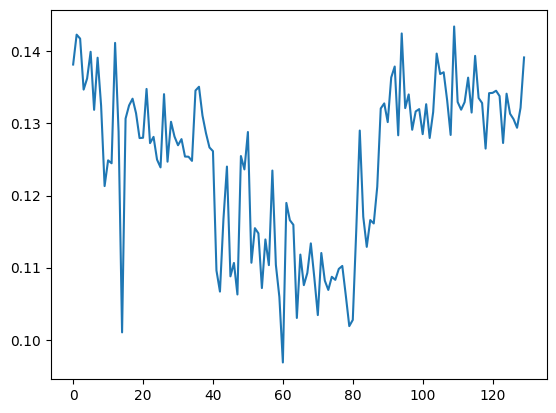

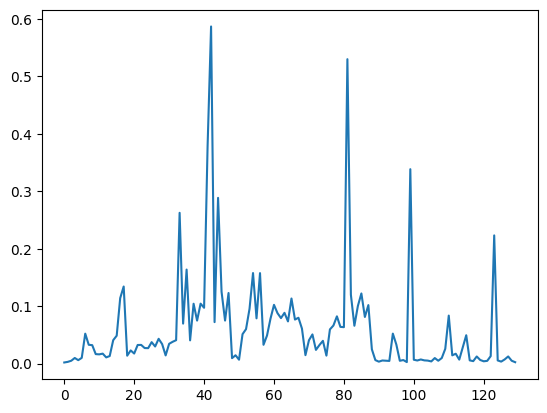

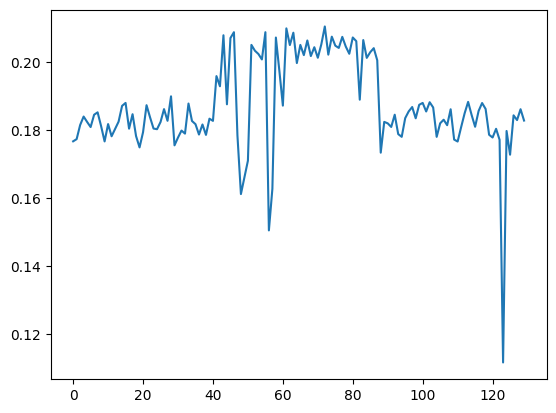

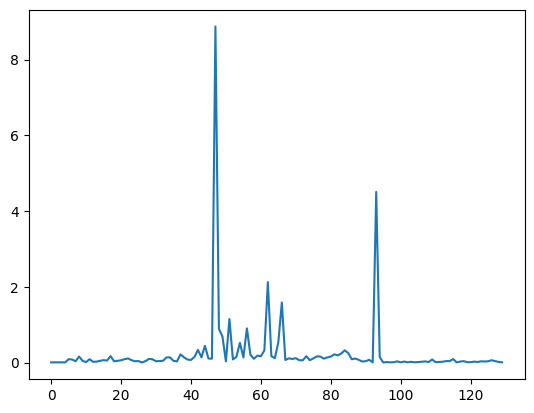

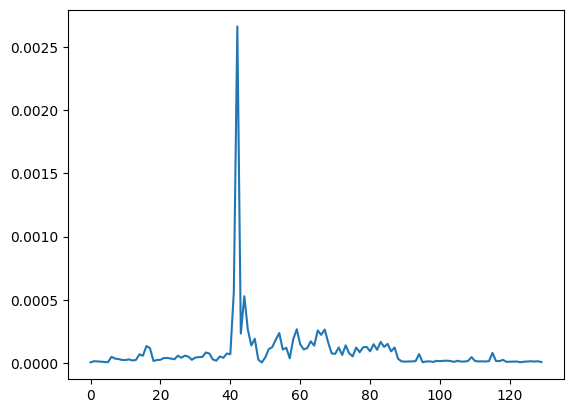

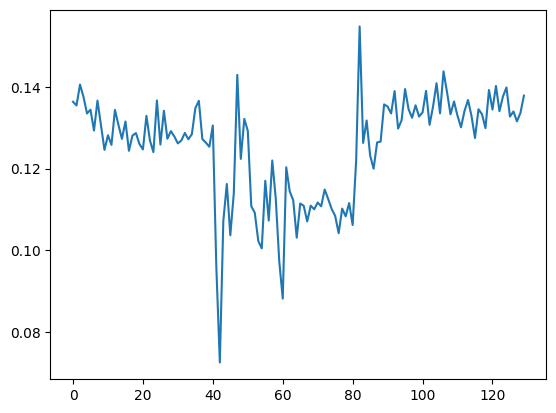

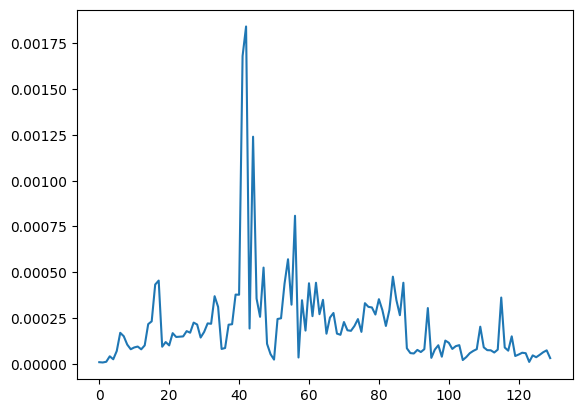

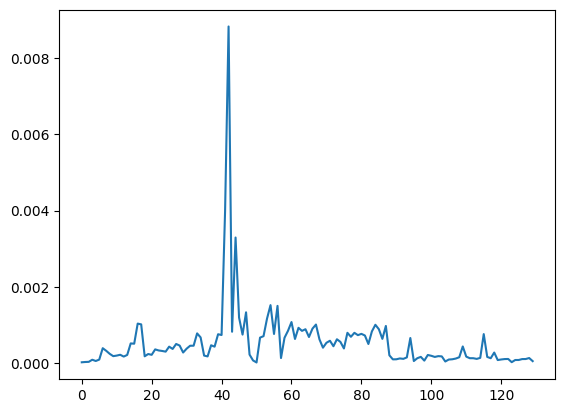

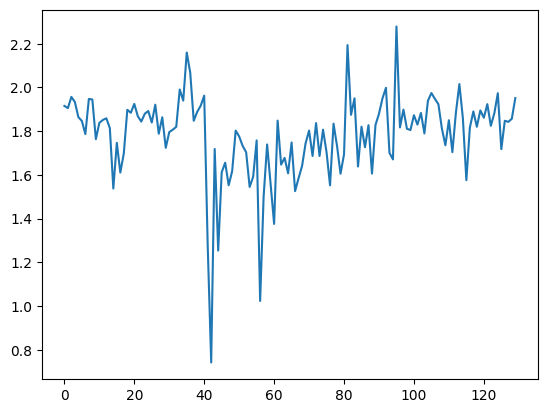

In [16]:
for i in range(9):
    plt.plot(X_10[:,i])
    plt.show()

In [28]:
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel

irregularities_kernel = 5.0**2 * RationalQuadratic(length_scale=5.0, alpha=1.0)
long_term_trend_kernel = 2.0**2 * RBF(length_scale=2.0)
noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)
kernel_gpr = irregularities_kernel + long_term_trend_kernel + noise_kernel

In [29]:
gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel_gpr, n_restarts_optimizer=10)
gpr.fit(X_train_n, Y_train_n)

GaussianProcessRegressor(kernel=5**2 * RationalQuadratic(alpha=1, length_scale=5) + 2**2 * RBF(length_scale=2) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=10)

RMSE test normalisé : 409.33301490971013


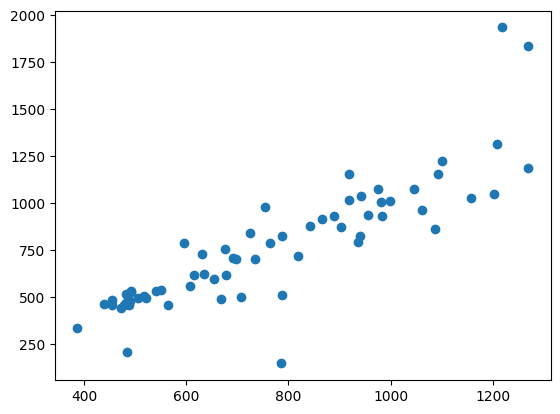

In [31]:
Y_predict_n = gpr.predict(X_test_n)
Y_predict = sc_y.inverse_transform(Y_predict_n)
print(f"RMSE test normalisé : {RMSE(Y_predict, Y_test)}")
plt.scatter(Y_predict, Y_test)

In [34]:
print(Y_test)
print(Y_train)

[ 485.  599. 1017.  704.  541.  209.  509. 1315.  499.  876. 1836.  731.
  527. 1227. 1039.  932. 1051.  459.  828.  462. 1014.  880. 1158.  719.
  796.  444.  498.  478.  511. 1190.  862.  148.  561.  917.  471. 1028.
 1009.  788.  535.  842.  335.  495.  828.  703.  489. 1935.  788.  617.
  461.  709.  935.  757. 1078.  940.  458. 1074.  468.  519.  616.  982.
  966.  534. 1156.  625.  457.]
[ 870.  438.  463. 1638. 1002. 1054.  857.  667. 1226.  559.  651.  492.
  816.  636.  466.  989.  850.  483. 1061. 1284.  480.  813.  502.  786.
  465.  923. 1115.  300.  494. 1063.  663.  713.  825.  483.  499.  648.
 1390.  487.  513.  772.  702.  742. 1155.  858. 1179.  477.  870. 1177.
  860.  876.  817.  429.  731.  520.  487.  429. 1093. 1801.  854.  461.
  481. 1146.  691. 1048.  858.]


In [209]:
def linear_regression(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle linéaire
    reg = linear_model.LinearRegression().fit(X_train, Y_train)

    # Prédictions
    mean_prediction_train = reg.predict(X_train)
    mean_prediction_test = reg.predict(X_test)    
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [26]:
def linear_logistic_regression(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle linéaire regression logistique
    clf = linear_model.LogisticRegression(penalty="none", solver="newton-cg")
    clf.fit(X_train, Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)   
    
    plt.scatter(Y_test, mean_prediction_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [171]:
def gaussian_process(X,Y):   
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle gaussien
    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    my_gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    my_gaussian_process.fit(X_train, Y_train)
    my_gaussian_process.kernel_
    
    # Prédictions
    mean_prediction_train, std_prediction = my_gaussian_process.predict(X_train, return_std=True)
    mean_prediction, std_prediction = my_gaussian_process.predict(X_test, return_std=True)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction,Y_test))

In [238]:
def lasso(X,Y,alpha):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle Lasso
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [307]:
def lassoLars(X,Y,alpha):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle Lasso
    clf = linear_model.LassoLars(alpha=alpha, normalize=False)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [313]:
def random_forests(X,Y,depth):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle random forests
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [326]:
def svr(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle SVR
    clf = SVR(C=1.0, epsilon=0.2)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [210]:
linear_regression(X,Y)

Train - RMSE= 42.73059061773277
Train - MAPE= 3.8897439124946342
Test - RMSE= 11182628.780417327
Test - MAPE= 193697.994680233


In [211]:
linear_logistic_regression(X,Y)

Train - RMSE= 0.0
Train - MAPE= 0.0
Test - RMSE= 240.60542684771562
Test - MAPE= 14.615320994644945


In [212]:
gaussian_process(X,Y)

Train - RMSE= 1.5640575048596605e-12
Train - MAPE= 1.1678612558277677e-13
Test - RMSE= 317.9026349408406
Test - MAPE= 23.545847772268953


/home/raphael/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [273]:
lasso(X,Y,1.311)

Train - RMSE= 119.7756538507421
Train - MAPE= 9.562750158594872
Test - RMSE= 294.22605760122195
Test - MAPE= 35.84965941767271


In [308]:
lassoLars(X,Y,1.33)

Train - RMSE= 120.02302300658687
Train - MAPE= 9.574119768031508
Test - RMSE= 291.1237532435875
Test - MAPE= 35.501449180349816


In [321]:
random_forests(X,Y,60)

Train - RMSE= 0.0
Train - MAPE= 0.0
Test - RMSE= 228.16817106186016
Test - MAPE= 18.277472079463163


In [322]:
svr(X,Y)

Train - RMSE= 327.839410819053
Train - MAPE= 38.99633498889251
Test - RMSE= 391.04151905872425
Test - MAPE= 35.878501419954524
